In [46]:
import os
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
import random

## Convert all images to .png format

In [3]:
root_path = '/media/honghanh/STORED_DATA/DATA/2020-Fake-News-Detection-Task-master/FakeNews'
img_folder = 'images'
new_folder = 'new_images'

In [18]:
img_list = os.listdir(os.path.join(root_path, img_folder))
path = os.path.join(root_path, new_folder)
if not os.path.exists(path):
    os.mkdir(os.path.join(root_path, new_folder))
for i in range(len(img_list)):
    img_path = os.path.join(root_path, img_folder, img_list[i])
    img = Image.open(img_path)
    #path = os.path.join(root_path, new_folder)
    img_name = img_list[i].split('.')[0]
    img.save(path + '/' + img_name + '.png')

In [19]:
new_img_list = os.listdir(os.path.join(root_path, new_folder))
assert len(img_list) == len(new_img_list), "Error"

## Explore data

In [63]:
files = ['5g_corona_conspiracy.json', 'non_conspiracy.json', 'other_conspiracy.json']

#### 5g_corona_conspiracy

In [56]:
file_path = os.path.join(root_path, files[0])
with open(file_path) as f:
    data = json.load(f)
data[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [57]:
data[0]

{'created_at': 'Thu Apr 02 13:59:42 +0000 2020',
 'id': 1245712513628622848,
 'id_str': '1245712513628622848',
 'full_text': 'This is mad 5g poles just popping up everywhere, now all of a sudden people just dropping down dead in the streets .. that ain’t corona or has it mutated already 🧐🤨',
 'truncated': False,
 'display_text_range': [0, 164],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 118928874,
  'id_str': '118928874',
  'name': 'BowseyFX',
  'screen_name': '5Star_Baller',
  'location': 'England',
  'description': 'just a squirrel tryna get a nut 💥💥',
  'url': 'https://t.co/aAOgI8UbWv',
  'entities': {'url': {'urls': [{'url': 'https://t.co/aAOgI8UbWv',
      'expanded_url':

5: #########################
Conspiracy theories online suggest #5G #technology, which will increase mobile connectivity speeds, is negatively affecting the current #COVIDー19 pandemic. 5G has no detrimental health effects in general, according to the #ICNIRP. @GovMurphy @Jared_Maples https://t.co/95jyvxaLdJ


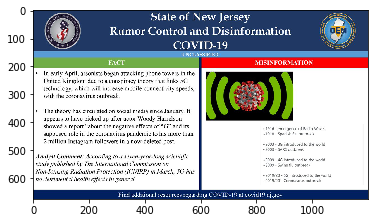

8: #########################
@Placebo90511492 bro
. check out the promoted tweet.. same guys telling France they got them covered for covid masks as long as they give them exclusive rights to 5G installations there. .
catch 22 the 5G whats gona kill you.. https://t.co/QVi6Jn6zYD


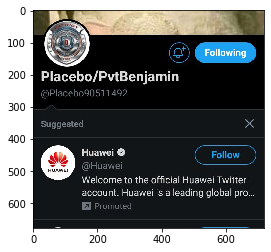

13: #########################
the majority of covid-19 deaths have occured one mile from the 5G towers ! 
BREAKING: 5G INTENSIFIES COVID-19 SYMPTOMS ACCORDING TO EXPERTS TOWERS MUST BE REMOVED. https://t.co/Ga9H8421XQ https://t.co/MZMuIvy3aH


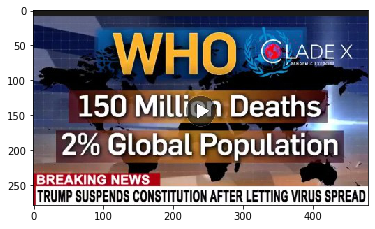

In [62]:
val = random.choices(data, k=20)
for i in range(len(val)):
    text = data[i]['full_text']
    name = data[i]['id_str'] + '.png'
    path = os.path.join(root_path, new_folder, name)
    if os.path.exists(path):
        print(str(i) + ': #########################')
        print(text)
        img = Image.open(path)
        plt.imshow(img)
        plt.show()
    

### non_conspiracy

4: #########################
Dear people who attack #TaraReade: read these two paragraphs. If you feel no empathy for Tara and think you're the victim being attacked, it means you're one of the bad guys; If you feel even conflicted but less critical of Tara it means you still have a soul. https://t.co/sbCl6DTm4w


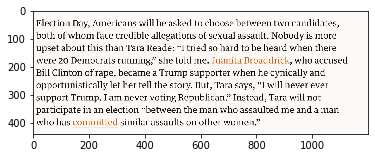

7: #########################
Good morning everyone! Our new episode on 5g Conspiracy Theories (which also happens to be packed to the gills with satire and Q news) is UP! Go listen and find out whether it's true you'll end up like these poor kids. https://t.co/BtFSYBFMrM https://t.co/g2SCidSgfL


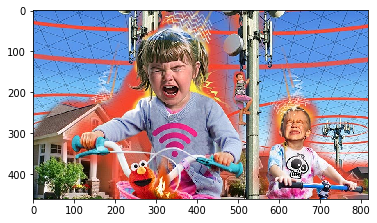

9: #########################
I drive past this every day and only noticed this morning that this mobile phone mast is disguised as a gigantic palm tree 😂 Equal parts unsettling but aesthetically pleasing. https://t.co/tdIDlwofJO


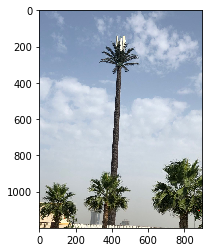

13: #########################
Only in this country could we be going through a National Pandemic and the one person trying his absolute best to protect and help the country out gets ripped to bits for his looks. Where’s your #BeKind tweets now? Chris Whitty = Legend 🙌🏽 https://t.co/HJCSYXciW9


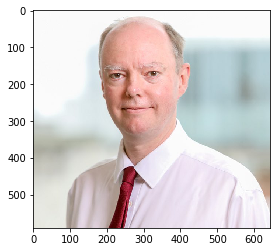

16: #########################
In tears, a nurse says she quit her job after she was asked to work in a coronavirus ICU without a face mask: “America is not prepared, and nurses are not being protected” https://t.co/ywoSuLOPYP https://t.co/S5BsnlO5nt


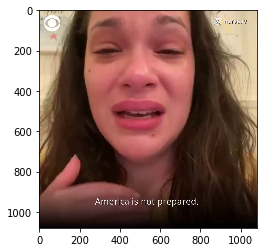

In [67]:
file_path = os.path.join(root_path, files[1])
with open(file_path) as f:
    data = json.load(f)
val = random.choices(data, k=20)
for i in range(len(val)):
    text = data[i]['full_text']
    name = data[i]['id_str'] + '.png'
    path = os.path.join(root_path, new_folder, name)
    if os.path.exists(path):
        print(str(i) + ': #########################')
        print(text)
        img = Image.open(path)
        plt.imshow(img)
        plt.show()

### other_conspiracy

0: #########################
WOW: A recently resurfaced story published by Italian State Media in 2015 highlighted how China was conducting biological expiriements with a Coronavirus derived from bats and mice, and modifying it with surface proteins to give it an ability to infect human respiratory cells. https://t.co/hdeXYBsJmq


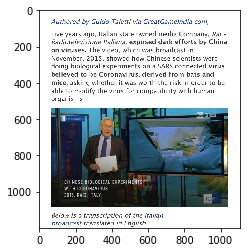

1: #########################
Is it too difficult for some people to understand?
No one is saying 5G caused Coronavirus, but that the virus which has similar manifestations was deliberately released as a cover-up for the effects of 5G on humans and other Biological matters! https://t.co/PAd2LeaO3a


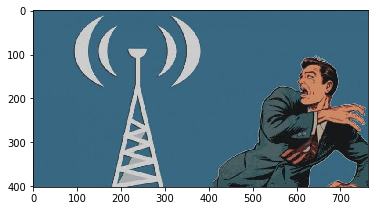

16: #########################
#5G is probably not whats causing #Covid_19, but that does still not make it any less of a fact that 5G IS TERRIBLE for your health. Animals die, trees die, it fucks with oxygen cells &amp; increases the risk of #cancer a lot. 5G is the first step for their "smart-grid" of control. https://t.co/zk5y29Pkp1


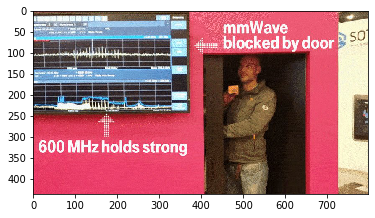

In [68]:
file_path = os.path.join(root_path, files[2])
with open(file_path) as f:
    data = json.load(f)
val = random.choices(data, k=20)
for i in range(len(val)):
    text = data[i]['full_text']
    name = data[i]['id_str'] + '.png'
    path = os.path.join(root_path, new_folder, name)
    if os.path.exists(path):
        print(str(i) + ': #########################')
        print(text)
        img = Image.open(path)
        plt.imshow(img)
        plt.show()